# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy import stats


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL

base_url = "https://api.openweathermap.org/data/2.5/weather?"
api_key = "&apikey=" + weather_api_key
units = "imperial" 


In [12]:
# Define an empty list to fetch the weather data for each city

city2 = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city2.append(city_weather['name'])
        city_lat.append(city_weather['coord']['lat'])
        city_lng.append(city_weather['coord']['lon'])
        city_max_temp.append(city_weather['main']['temp_max'])
        city_humidity.append(city_weather['main']['humidity'])
        city_clouds.append(city_weather['clouds']['all'])
        city_wind.append(city_weather['wind']['speed'])
        city_country.append(city_weather['sys']['country'])
        city_date.append(city_weather['dt'])
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 1 | seidu
Processing Record 3 of Set 1 | san felipe
Processing Record 4 of Set 1 | jonava
Processing Record 5 of Set 1 | xining
Processing Record 6 of Set 1 | kualakapuas
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ventspils
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | mount isa
Processing Record 11 of Set 1 | cayenne
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | guacimo
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | brae
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | romny
Processing Record 22 of Set 1 | nikolskoye
Processing Record 

Processing Record 31 of Set 4 | cascas
Processing Record 32 of Set 4 | samusu
City not found. Skipping...
Processing Record 33 of Set 4 | arroio dos ratos
Processing Record 34 of Set 4 | beringovskiy
Processing Record 35 of Set 4 | isangel
Processing Record 36 of Set 4 | carnarvon
Processing Record 37 of Set 4 | namibe
Processing Record 38 of Set 4 | jinxiang
Processing Record 39 of Set 4 | loralai
Processing Record 40 of Set 4 | half moon bay
Processing Record 41 of Set 4 | dingle
Processing Record 42 of Set 4 | cirie
Processing Record 43 of Set 4 | mahajanga
Processing Record 44 of Set 4 | tabou
Processing Record 45 of Set 4 | waddan
Processing Record 46 of Set 4 | tocopilla
Processing Record 47 of Set 4 | cozumel
Processing Record 48 of Set 4 | pyaozerskiy
Processing Record 49 of Set 4 | tabas
Processing Record 0 of Set 5 | bambous virieux
Processing Record 1 of Set 5 | arlit
Processing Record 2 of Set 5 | belaya gora
Processing Record 3 of Set 5 | faanui
Processing Record 4 of Set 

Processing Record 23 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 24 of Set 8 | el carrizo
Processing Record 25 of Set 8 | arman
Processing Record 26 of Set 8 | los llanos de aridane
Processing Record 27 of Set 8 | ballybofey
Processing Record 28 of Set 8 | zhezkazgan
Processing Record 29 of Set 8 | fortuna
Processing Record 30 of Set 8 | ergani
Processing Record 31 of Set 8 | palmer
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | kleck
City not found. Skipping...
Processing Record 34 of Set 8 | saint-pierre
Processing Record 35 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 36 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 37 of Set 8 | gorom-gorom
Processing Record 38 of Set 8 | missoula
Processing Record 39 of Set 8 | ormara
Processing Record 40 of Set 8 | kenora
Processing Record 41 of Set 8 | nishihara
Processing Record 42 of Set 8 | pallasovka
Processing Record 43 of Set 8 | rovaniemi
Processing

Processing Record 11 of Set 12 | taksimo
Processing Record 12 of Set 12 | cordoba
Processing Record 13 of Set 12 | pangnirtung
Processing Record 14 of Set 12 | bure
Processing Record 15 of Set 12 | paka
Processing Record 16 of Set 12 | sibolga
Processing Record 17 of Set 12 | waltershausen
Processing Record 18 of Set 12 | champerico
Processing Record 19 of Set 12 | mecca
Processing Record 20 of Set 12 | krasnyy chikoy
Processing Record 21 of Set 12 | haibowan
City not found. Skipping...
Processing Record 22 of Set 12 | burica
City not found. Skipping...
Processing Record 23 of Set 12 | winchester
Processing Record 24 of Set 12 | matara
Processing Record 25 of Set 12 | redlands
Processing Record 26 of Set 12 | camacari
Processing Record 27 of Set 12 | salalah
Processing Record 28 of Set 12 | tindwari
Processing Record 29 of Set 12 | khuzhir
Processing Record 30 of Set 12 | kattivakkam
Processing Record 31 of Set 12 | indri
Processing Record 32 of Set 12 | bulgan
Processing Record 33 of 

In [13]:
# Convert the cities weather data into a Pandas DataFrame

city_data_dict = {
    "City": city2,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date}


city_data = pd.DataFrame(city_data_dict)
city_data.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [14]:
# Display sample data
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Seidu,9.0167,-10.6000,72.61,18,51,1.81,SL,1673734412
1,San Felipe,10.3399,-68.7425,79.77,71,51,5.73,VE,1673734412
2,Jonava,55.0833,24.2833,41.05,89,100,5.75,LT,1673734413
3,Xining,36.6167,101.7667,4.60,91,95,2.17,CN,1673734413
4,Kualakapuas,-3.0091,114.3876,74.03,94,100,2.30,ID,1673734413


In [15]:
# Export the City_Data into a csv
city_data.to_csv("output_data_HW/cities2.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data = pd.read_csv("output_data_HW/cities2.csv", index_col="City_ID")

# Display sample data
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Seidu,9.0167,-10.6000,72.61,18,51,1.81,SL,1673734412
1,San Felipe,10.3399,-68.7425,79.77,71,51,5.73,VE,1673734412
2,Jonava,55.0833,24.2833,41.05,89,100,5.75,LT,1673734413
3,Xining,36.6167,101.7667,4.60,91,95,2.17,CN,1673734413
4,Kualakapuas,-3.0091,114.3876,74.03,94,100,2.30,ID,1673734413


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

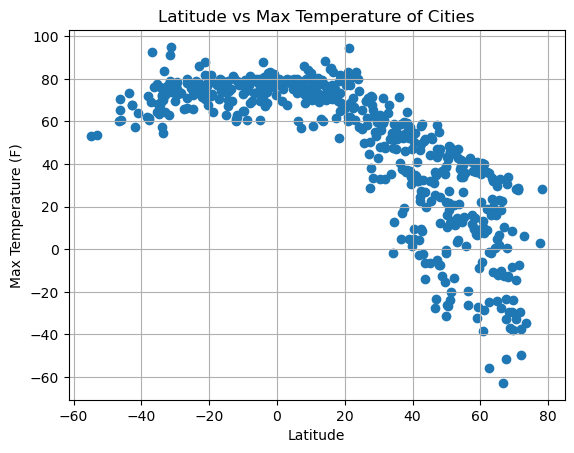

In [17]:
# Build scatter plot for latitude vs. temperature

x = city_data["Lat"]
y = city_data["Max Temp"]

plt.scatter(x, y)

# Incorporate the other graph properties

plt.title("Latitude vs Max Temperature of Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data_HW/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

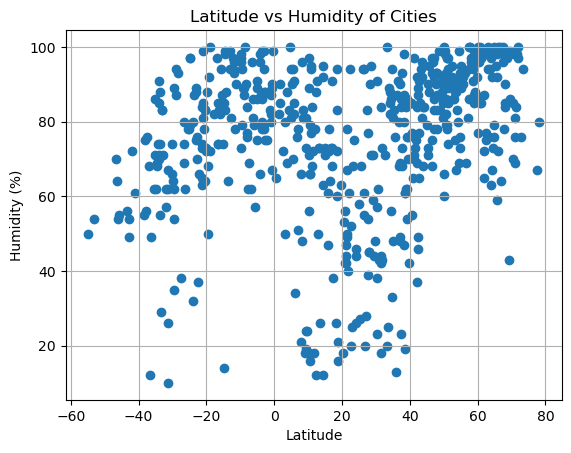

In [18]:
# Build the scatter plots for latitude vs. humidity

x = city_data["Lat"]
y = city_data["Humidity"]

plt.scatter(x, y)

# Incorporate the other graph properties

plt.title("Latitude vs Humidity of Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data_HW/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

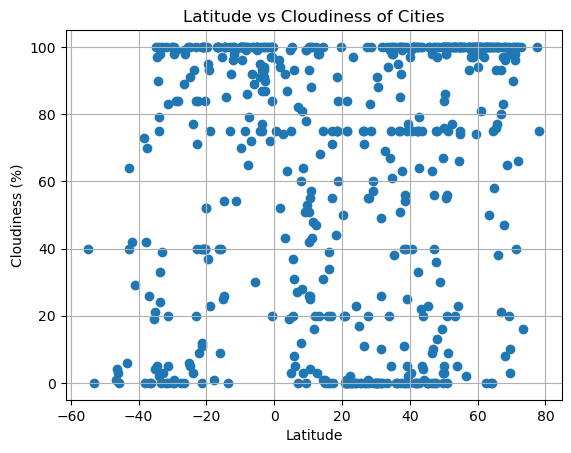

In [19]:
# Build the scatter plots for latitude vs. cloudiness

x = city_data["Lat"]
y = city_data["Cloudiness"]

plt.scatter(x, y)

# Incorporate the other graph properties

plt.title("Latitude vs Cloudiness of Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data_HW/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

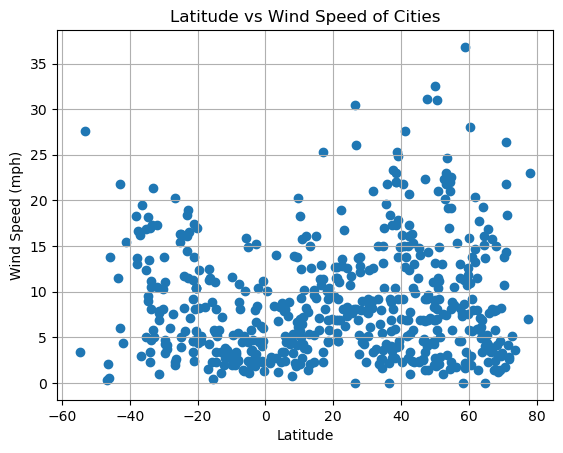

In [20]:
# Build the scatter plots for latitude vs. wind speed

x = city_data["Lat"]
y = city_data["Wind Speed"]

plt.scatter(x, y)

# Incorporate the other graph properties

plt.title("Latitude vs Wind Speed of Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("output_data_HW/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
                                              
northern_hemi = city_data[(city_data["Lat"]>=0)]
northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Seidu,9.0167,-10.6000,72.61,18,51,1.81,SL,1673734412
1,San Felipe,10.3399,-68.7425,79.77,71,51,5.73,VE,1673734412
2,Jonava,55.0833,24.2833,41.05,89,100,5.75,LT,1673734413
3,Xining,36.6167,101.7667,4.60,91,95,2.17,CN,1673734413
6,Ventspils,57.3894,21.5606,40.93,100,100,11.50,LV,1673734415


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi = city_data[(city_data["Lat"]<=0)]
southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,Kualakapuas,-3.0091,114.3876,74.03,94,100,2.30,ID,1673734413
5,Rikitea,-23.1203,-134.9692,78.10,75,84,14.50,PF,1673734414
8,Mount Isa,-20.7333,139.5000,76.77,78,100,8.05,AU,1673734415
10,Hobart,-42.8794,147.3294,67.86,54,40,21.85,AU,1673734416
13,Hermanus,-34.4187,19.2345,68.81,74,90,13.51,ZA,1673734342


In [23]:
# Define a function to create Linear Regression plots

def plotlinearRegression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    r_squared = rvalue**2
    print(f"The R-squared is: {round(r_squared,3)}")
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(f'Latitude vs {y_label} of {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.show

The R-squared is: 0.655


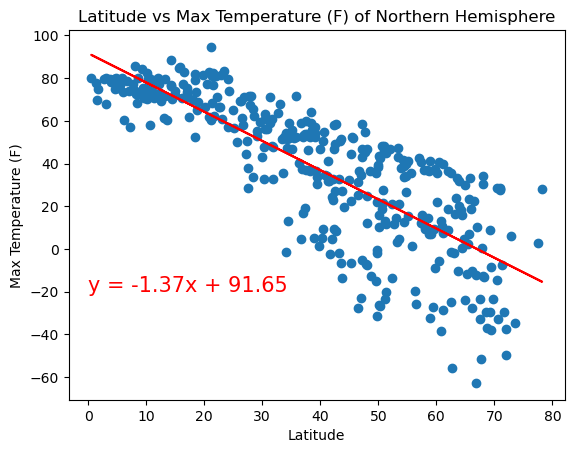

In [24]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
y_label = "Max Temperature (F)"
hemi = "Northern Hemisphere"
xy = (0,-20)
plotlinearRegression(x_values,y_values)

The R-squared is: 0.136


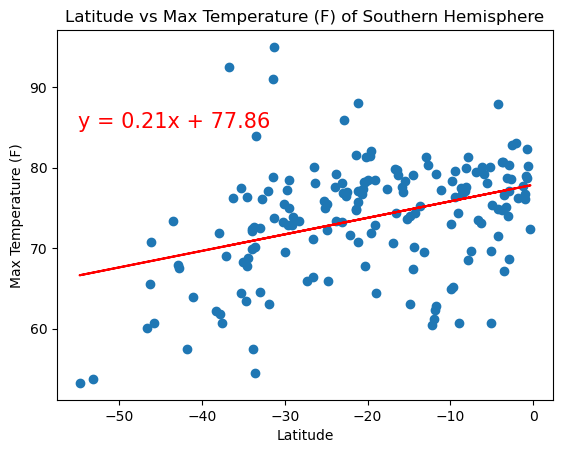

In [25]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
y_label = "Max Temperature (F)"
hemi = "Southern Hemisphere"
xy = (-55,85)
plotlinearRegression(x_values,y_values)

**Discussion about the linear relationship:** The linear regression indicate a negative relationship between latitude and maximum temperature in the observed Northern Hemisphere cities with an R-Squared of 0.655. The linear regression of the observed Southern Hemisphere cities was positive with an R-Sqared of 0.136. This is reasonable as the latitudes closer to the equator (latitude = 0) tend to have higher maximum temperates. And as the latitude moves away from the equator, the maximum temperature decreases. The linear relationship between the two variables was stronger in the Northern Hemisphere, most likely due to sampling.

### Humidity vs. Latitude Linear Regression Plot

The R-squared is: 0.198


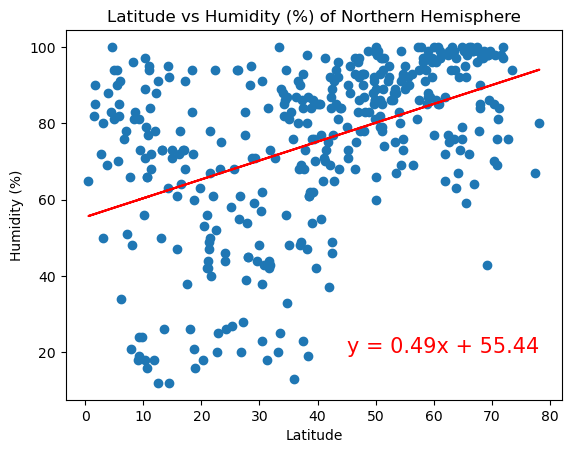

In [26]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_label = "Humidity (%)"
hemi = "Northern Hemisphere"
xy = (45,20)
plotlinearRegression(x_values,y_values)


The R-squared is: 0.246


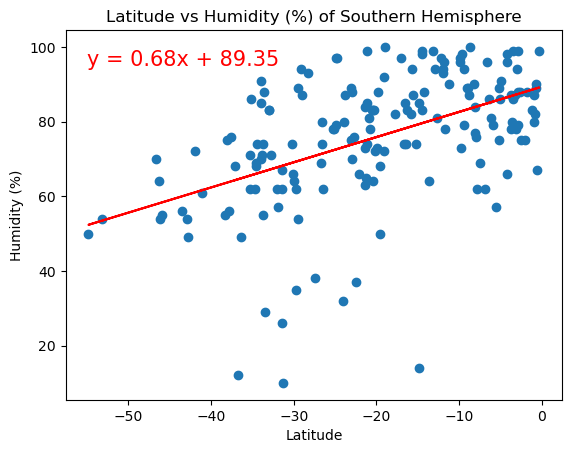

In [27]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_label = "Humidity (%)"
hemi = "Southern Hemisphere"
xy = (-55,95)
plotlinearRegression(x_values,y_values)


**Discussion about the linear relationship:** The linear relationship between latitude and humidity appear to be weak in both the Northern and Southern Hemisphers, with R-squared values of 0.198 and 0.246, respectively.

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared is: 0.105


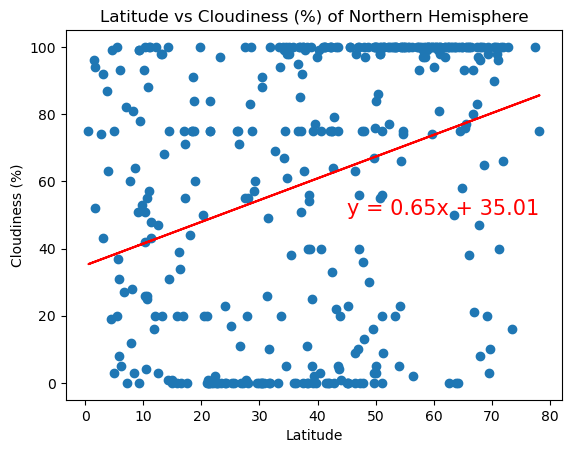

In [28]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_label = "Cloudiness (%)"
hemi = "Northern Hemisphere"
xy = (45,50)
plotlinearRegression(x_values,y_values)


The R-squared is: 0.28


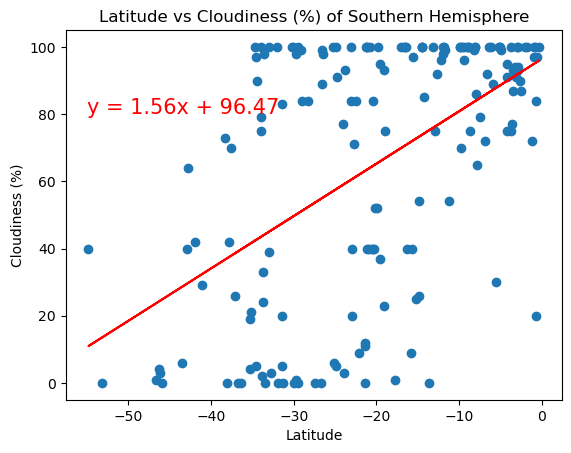

In [29]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_label = "Cloudiness (%)"
hemi = "Southern Hemisphere"
xy = (-55,80)
plotlinearRegression(x_values,y_values)

**Discussion about the linear relationship:** The relationship between latitude and cloudiness appears to be weak in both hemispheres, with low R-squared values of 0.105 in the Northern Hemisphere and 0.28 in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared is: 0.007


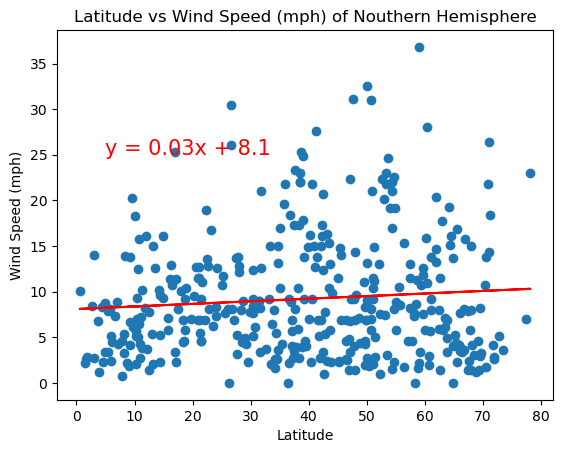

In [30]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
y_label = "Wind Speed (mph)"
hemi = "Nouthern Hemisphere"
xy = (5,25)
plotlinearRegression(x_values,y_values)

The R-squared is: 0.139


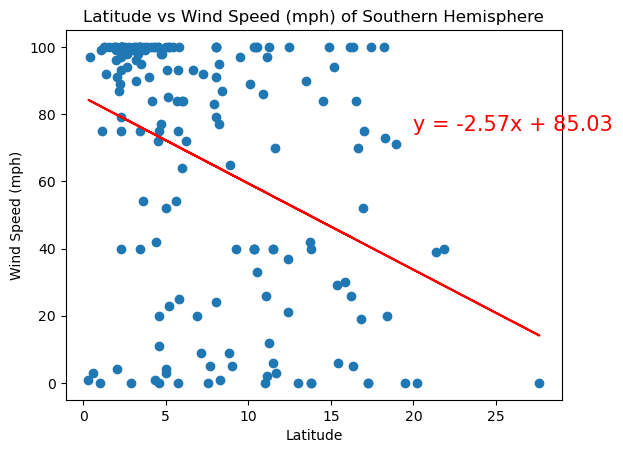

In [31]:
# Southern Hemisphere

x_values = southern_hemi_df["Wind Speed"]
y_values = southern_hemi_df["Cloudiness"]
y_label = "Wind Speed (mph)"
hemi = "Southern Hemisphere"
xy = (20,75)
plotlinearRegression(x_values,y_values)

**Discussion about the linear relationship:** In the observed data, the relationship between latitude and wind speed appear to be extremely weak for both hemispheres based on the linear regressions. The R-squared values are 0.007 in the Northern Hemisphere and 0.139 in Southern Hemisphere.